In [276]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from collections import namedtuple
from typing_extensions import NamedTuple
import sympy
import math
import random

np.random.seed(10)
random.seed(100)

Design a tree based classification algorithm that takes a list of $[(x,y)]$ values and designs a decision tree with less than or greater than equal to   splits that approximates the data generation process.

Here $x \in \mathbb{R}^d, y \in \mathbb{R}/ \mathbb{N}$

In [277]:
class Node:

    def __init__(self, data, initialized = False, median = 0, error = 0, dimension = 0,
                 upper_bound = None, lower_bound = None, var = None, split_range = 20):

        # data is a list of points of type Data

        self.data = data
        self.error = 0
        self.dimension = dimension

        if data != []:
            self.state_dimension = len((self.data)[0].x)
            self.split_range = split_range

            if not initialized:

                best_error = np.inf
                error = 0
                self.action = round(np.median([p.y for p in data]),2)

                for dim in range(self.state_dimension):
                    for p in data:
                        error += np.abs(p.y - self.action)
                    if error < best_error:
                        self.dimension = dim
                        self.upper_bound = np.max([p.x[dim] for p in data])
                        self.lower_bound = np.min([p.x[dim] for p in data])
                        self.var = (self.upper_bound - self.lower_bound + 1) / len(data)
                        self.median = np.median([p.x[dim] for p in data])
                        self.split_val = self.median
                        self.error = error


    def is_null_node(self):
        return len(self.data) == 0

    def calculate_split(self):

        best_dimension = 0
        best_reduction_in_error = 0
        total_error = self.error
        best_split_val = 0
        best_left_node = None
        best_right_node = None

        if (len(self.data) != 0):
            for dim in range(self.state_dimension):
                lower_bound = np.min([p.x[dim] for p in self.data])
                upper_bound = np.max([p.x[dim] for p in self.data])
                var = (upper_bound - lower_bound + 1) / len(self.data)
                split_list = np.linspace(lower_bound, upper_bound, self.split_range)

                for split_val in split_list:

                    left_data = []
                    right_data = []

                    for datapoint in self.data:
                        if (datapoint.x[dim] < split_val):
                            left_data.append(datapoint)
                        else:
                            right_data.append(datapoint)

                    if left_data != [] and right_data != []:
                        left_node = Node(left_data)
                        right_node = Node(right_data)
                        total_error = left_node.error + right_node.error
                        reduction_in_error = self.error - total_error

                        if reduction_in_error > best_reduction_in_error:
                            self.dimension = dim
                            self.split_val = split_val
                            best_reduction_in_error = reduction_in_error
                            best_split_val = split_val
                            best_left_node = left_node
                            best_right_node = right_node

            if best_left_node == None:
                print('Left node is empty')
                return Node([]), Node([])

            elif best_right_node == None:
                print('Right node is empty')
                return Node([]), Node([])

        return best_left_node, best_right_node


    def info(self):

        print('Node information is given as following:')
        print(f'{len(self.data)} is the number of data points analyzed in this dataset')
        print(f'{self.dimension} is the selected dimension for the node')
        print(f'{self.state_dimension} is the dimension of the state space')
        print(f'{self.upper_bound} is the upper bound')
        print(f'{self.lower_bound} is the lower bound')
        print(f'{self.var} is the variance')
        print(f'{self.median} if the median')

    def __str__(self):

        return f'{len(self.data)}: Number of points, all points in the {self.dimension} dimension'

In [278]:
Data = namedtuple('data', ['x', 'y'])
point = Data(np.random.randn(5), 1)
print(point.x, point.y)

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597] 1


In [279]:
def generate_data(size, dimension, f):

    data = []
    for i in range(size):
        x = np.random.randn(dimension)
        y = f(x)
        datapoint = Data(x,y)
        data.append(datapoint)
    return data

def generate_grid_data(x_size, y_size,
                       num_x = None, num_y = None,
                       goal=[]):
    '''
    Actions are [0,1,2,3]
    0 : Right
    1 : Up
    2: Left
    3: Down
    '''
    data = []

    if len(goal) == 0:
        goal = np.array([x_size-1, y_size-1])
    if num_x == None:
        num_x = x_size
    if num_y == None:
        num_y = y_size

    for x in np.linspace(0, x_size, num_x):
        for y in np.linspace(0, y_size, num_y):
            z = grid_eval(np.array([x,y]), x_size, y_size, goal)
            datapoint = Data(np.array([x,y]), z)
            data.append(datapoint)
    return data

def grid_eval(x, grid_x, grid_y, goal):

    # [0,1,2,3] denote the list of possible actions
    # 0 is right, 1 is up, 2 is left, and 3 is down

    if x[0] > goal[0]:
        return 2
    elif x[1] > goal[1]:
        return 3
    elif x[0] < goal[0]:
        return 0
    elif x[1] < goal[1]:
        return 1
    else:
        return 1


def generate_assymetric_data(size, f,
                             new_mean=10, new_sigma=2):

    data = []
    for i in range(size):
        x_1 = np.random.randn(1)
        x_new = (np.random.randn(1) + new_mean) * new_sigma
        x = list(x_1) + list(x_new)
        y = f(x)
        datapoint = Data(x,y)
        data.append(datapoint)

    return data

def f(x, lam = 1.0):
    return np.exp(lam * np.sum(x)) / (1 + np.exp(lam * np.sum(x)))

def g(x):
    return math.floor(x) % 3

In [280]:
SIZE = 100
DEPTH = 3
#DEPTH_RANGE = np.arange(3,10,2)
#depth_to_error = {}

data = generate_grid_data(10,10)
n = Node(data)
#data

In [281]:
n.calculate_split()
n.info()
print(n)

Node information is given as following:
100 is the number of data points analyzed in this dataset
1 is the selected dimension for the node
2 is the dimension of the state space
10.0 is the upper bound
0.0 is the lower bound
0.11 is the variance
5.0 if the median
100: Number of points, all points in the 1 dimension


In [300]:
class Tree:

    def __init__(self, head, max_depth, curr_depth=1):
        self.head = head
        self.curr_depth = curr_depth
        self.max_depth = max_depth
        if head.data != []:
            self.left = Tree(Node([]), max_depth, self.curr_depth+1)
            self.right = Tree(Node([]), max_depth, self.curr_depth+1)

    def build_tree(self):

        if self.curr_depth < self.max_depth:

            left_node, right_node = self.head.calculate_split()

            if (left_node == None) or (right_node == None):
                print(f'Tree pruned at {self.curr_depth}')
                # All NULL nodes have head to be given by Node([])
                self.left = Tree(Node([]), self.max_depth, curr_depth = self.curr_depth+1)
                self.right = Tree(Node([]), self.max_depth, curr_depth = self.curr_depth+1)
                return

            self.left = Tree(left_node, self.max_depth, self.curr_depth + 1)
            self.right = Tree(right_node, self.max_depth, self.curr_depth + 1)

            self.left.build_tree()
            self.right.build_tree()

        else:
            self.left = Tree(Node([]), self.max_depth, curr_depth = self.max_depth+1)
            self.right = Tree(Node([]), self.max_depth, curr_depth = self.max_depth+1)


    def print_tree(self):

        if len(self.head.data) != 0:
            print(f'{self.head.dimension}th dimension < {self.head.split_val}, depth {self.curr_depth}, action {self.head.action}')

            if len(self.left.head.data) != 0:
                print('Left node being printed')
                self.left.print_tree()
            if len(self.right.head.data) != 0:
                print('Right node being printed')
                self.right.print_tree()

    def plot_splits(self, ax, action_color_dict,
                    color_bounds = [-5, 5], plotted_colors = [],
                    show_all_cuts = False, first_left_line = True):

        # Plot the vertical line cuts depending on whether we show all the cuts
        if show_all_cuts:
            ax.axvline(x=color_bounds[0],
                       color=(0, 0, 0),
                       linestyle='-')
            print(f'Plot line $x={color_bounds[0]}$')
        else:
            if (len(self.left.head.data) == 0) or (len(self.right.head.data) == 0) or self.curr_depth == self.max_depth:
                ax.axvline(x=color_bounds[0],
                           color=(0, 0, 0),
                           linestyle='-')
                print(f'Plot partition line $x={color_bounds[0]}$')

        # Plot the colored regions
        if (len(self.left.head.data) == 0) or (len(self.right.head.data) == 0) or (self.curr_depth == self.max_depth):
            if self.head.action not in plotted_colors:

                ax.axvspan(color_bounds[0], color_bounds[1], alpha=0.8,
                           color = action_color_dict[self.head.action],
                           label = f'Action = {self.head.action}')
                plotted_colors.append(self.head.action)
            else:
                ax.axvspan(color_bounds[0], color_bounds[1], alpha=0.8,
                        color = action_color_dict[self.head.action])

            plt.legend()
            ax.set_title('Splits of 1D space')

        else:
            (self.left).plot_splits(ax, action_color_dict,
            [color_bounds[0], self.head.split_val], plotted_colors)

            (self.right).plot_splits(ax, action_color_dict,
            [self.head.split_val, color_bounds[1]], plotted_colors)

    def plot_splits_2D(self, ax, action_color_dict,
                       color_bounds = [[-0.05,5], [-0.05,5]],
                       plotted_colors = [], prev_dim = 0):

        if (len(self.head.data) == 0):
            print(f'Empty node found')
            return

        #If we are at a last node plot the vertical/horizontal lines/regions
        if (len(self.left.head.data) == 0) or (len(self.right.head.data) == 0):
            if prev_dim == 0:
                print(f'Plot partition line $x_{prev_dim} = {color_bounds[0][0]}$')
                ax.plot([color_bounds[0][0], color_bounds[0][0]], color_bounds[1], color=(0,0,0), linestyle='-')

                if self.head.action not in plotted_colors:

                    ax.fill_between(color_bounds[0], min(color_bounds[1]),
                                    max(color_bounds[1]), label = f'Action={self.head.action}',
                                    alpha=0.5, color = action_color_dict[self.head.action])

                    plotted_colors.append(self.head.action)
                    print(f'We color the vertical region from {color_bounds[0][0]} to {color_bounds[0][1]} from ymin={color_bounds[1][0]} to ymax = {color_bounds[1][1]} with {self.head.action} color')
                else:
                    ax.fill_between(color_bounds[0], min(color_bounds[1]),
                                    max(color_bounds[1]),
                                    alpha=0.5, color = action_color_dict[self.head.action])
                    print(f'We color the vertical region from {color_bounds[0][0]} to {color_bounds[0][1]} from ymin={color_bounds[1][0]} to ymax = {color_bounds[1][1]} with {self.head.action} color')

            elif prev_dim == 1:
                print(f'Plot partition line  x_{self.head.dimension} = {color_bounds[1][0]}')
                ax.plot(color_bounds[0], [color_bounds[1][0], color_bounds[1][0]], color=(0,0,0), linestyle='-')

                if self.head.action not in plotted_colors:
                    ax.fill_between(color_bounds[0], min(color_bounds[1]),
                                    max(color_bounds[1]), label = f'Action={self.head.action}',
                                    alpha=0.5, color = action_color_dict[self.head.action])

                    plotted_colors.append(self.head.action)
                    print(f'We color the horizontal region from {color_bounds[1][0]} to {color_bounds[1][1]} from xmin={color_bounds[0][0]} to xmax = {color_bounds[0][1]} with {self.head.action} color')
                else:
                    ax.fill_between(color_bounds[0], min(color_bounds[1]),
                                    max(color_bounds[1]), label = f'Action={self.head.action}',
                                    alpha=0.5, color = action_color_dict[self.head.action])
                    print(f'We color the horizontal region from {color_bounds[1][0]} to {color_bounds[1][1]} from xmin={color_bounds[0][0]} to xmax = {color_bounds[0][1]} with {self.head.action} color')
            plt.legend()
            ax.set_title('Splits of the 2D space')

        # If we are not at the last node, decide further splits
        elif self.head.dimension == 0:
            (self.left).plot_splits_2D(ax, action_color_dict,
                                       [[color_bounds[0][0], self.head.split_val],
                                       [color_bounds[1][0], color_bounds[1][1]]],
                                       plotted_colors, prev_dim = 0)

            (self.right).plot_splits_2D(ax, action_color_dict,
                                        [[self.head.split_val, color_bounds[0][1]],
                                        [color_bounds[1][0], color_bounds[1][1]]],
                                        plotted_colors, prev_dim = 0)

        elif self.head.dimension == 1:

            (self.left).plot_splits_2D(ax, action_color_dict,
                                      [[color_bounds[0][0], color_bounds[0][1]],
                                      [color_bounds[1][0], self.head.split_val]],
                                      plotted_colors, prev_dim =1)

            (self.right).plot_splits_2D(ax, action_color_dict,
                                        [[color_bounds[0][0], color_bounds[0][1]],
                                        [self.head.split_val, color_bounds[1][1]]],
                                        plotted_colors, prev_dim =1)


    def plot_tree(self, x, y, step_x, step_y, bounds = [-3, 3]):

        # Plot current node
        if len(self.head.data) != 0:

            first_bound = f"{round(bounds[0],2)} < $x_0$ < {round(bounds[0],2)}"
            action = f"\nAction = {self.head.action}"
            text = first_bound + action

            plt.text(x, y, text,
                    ha='center', va='center', bbox=dict(facecolor='lightblue', alpha=0.5, edgecolor='black', pad=0),
                    fontsize=8, fontweight='bold', style='italic', fontfamily='serif')

            plt.plot([x, x-step_x], [y, y-step_y], 'b-', linewidth=1)  # Arrow towards left child
            plt.plot([x, x+step_x], [y, y-step_y], 'b-', linewidth=1)  # Arrow towards right child

        # Plot left child
            self.left.plot_tree(x - step_x, y - step_y, step_x/2, step_y, [bounds[0], round(self.head.split_val,2)])

        # Plot right child
            self.right.plot_tree(x + step_x, y - step_y, step_x/2, step_y, [round(self.head.split_val,2), bounds[1]])


    def plot_tree_2D(self, x, y, step_x, step_y, bounds = [[-3, 3],[-3, 3]]):

        # Plot current node
        if len(self.head.data) == 0:
            print('Zero node found!')
        else:
            first_bound = f"{round(bounds[0][0],2)} < $x_0$ < {round(bounds[0][1],2)}"
            next_bound = f"\n{round(bounds[1][0],2)} < $x_1$ < {round(bounds[1][1],2)}"
            action = f"\nAction = {self.head.action}"
            text = first_bound + next_bound + action

            plt.text(x, y, text,
                     ha='center', va='center', bbox=dict(facecolor='lightblue', alpha=0.5, edgecolor='black', pad=0),
                     fontsize=8, fontweight='bold', style='italic', fontfamily='serif')

            plt.plot([x, x-step_x], [y, y-step_y], 'b-', linewidth=1)  # Arrow towards left child
            plt.plot([x, x+step_x], [y, y-step_y], 'b-', linewidth=1)  # Arrow towards right child

        if len(self.left.head.data) != 0 and len(self.right.head.data) != 0:
            if self.head.dimension == 0:

                self.left.plot_tree_2D(x-step_x, y-step_y, step_x/2, step_y,
                                    [[bounds[0][0], round(self.head.split_val,2)], bounds[1]])

                self.right.plot_tree_2D(x+step_x, y-step_y, step_x/2, step_y,
                                    [[round(self.head.split_val,2), bounds[0][1]], bounds[1]])
            elif self.head.dimension == 1:

                self.left.plot_tree_2D(x-step_x, y-step_y, step_x/2, step_y,
                                    [bounds[0],[bounds[1][0], round(self.head.split_val,2)]])

                self.right.plot_tree_2D(x+step_x, y-step_y, step_x/2, step_y,
                                    [bounds[0], [round(self.head.split_val,2), bounds[1][1]]])


    def calculate_approximation_error(self, total = 0):

        if len(self.left.head.data) == 0:
            return self.head.error
        else:
            total += self.left.calculate_approximation_error(total)
            total += self.right.calculate_approximation_error(total)
        return total

To Do:

*   Work on 2D/ND versions of this

In [301]:
Data = namedtuple('data', ['x', 'y'])
point = Data(np.random.randn(5), 1)
print(point.x, point.y)

[ 0.44513761 -1.13660221  0.13513688  1.484537   -1.07980489] 1


In [302]:
def generate_data(size, dimension, f):

    data = []
    for i in range(size):
        x = np.random.randn(dimension)
        y = f(x)
        datapoint = Data(x,y)
        data.append(datapoint)
    return data

def f(x, lam = 1.0):
    return np.exp(lam * np.sum(x)) / (1 + np.exp(lam * np.sum(x)))

def g(x):
    return math.floor(np.sum(x) % 3)

In [303]:
SIZE = 1000
DIMENSIONS = 1
DEPTH = 5
DEPTH_RANGE = np.arange(3,10,2)
depth_to_error = {}

data = generate_grid_data(5,5, goal = [2,2], num_x = 10, num_y = 10)
n = Node(data, 0)
t = Tree(n, DEPTH)
t.build_tree()

Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 3
Tree pruned at 3


In [304]:
t.print_tree()

0th dimension < 1.8421052631578947, depth 1, action 2.0
Left node being printed
1th dimension < 1.8421052631578947, depth 2, action 3.0
Left node being printed
1th dimension < 0.8333333333333334, depth 3, action 0.0
Right node being printed
1th dimension < 3.6111111111111116, depth 3, action 3.0
Right node being printed
1th dimension < 2.5, depth 2, action 2.0


Plot partition line  x_1 = -0.5
We color the horizontal region from -0.5 to 1.8421052631578947 from xmin=-0.5 to xmax = 1.8421052631578947 with 0.0 color
Plot partition line  x_1 = 1.8421052631578947
We color the horizontal region from 1.8421052631578947 to 6 from xmin=-0.5 to xmax = 1.8421052631578947 with 3.0 color
Plot partition line $x_0 = 1.8421052631578947$
We color the vertical region from 1.8421052631578947 to 6 from ymin=-0.5 to ymax = 6 with 2.0 color


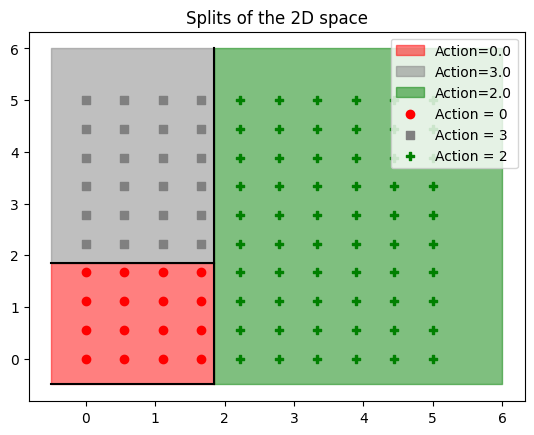

In [305]:
x_vals = [p.x for p in data]
x_0 = [x[0] for x in x_vals]
x_1 = [x[1] for x in x_vals]
y_vals = [p.y for p in data]

action_color_dict = {0:'red', 1:'blue', 2:'green', 3:'grey'}
action_marker_dict = {0:'o', 1:'x', 2:'P', 3:'s'}
plotted_markers = []
plotted_colors = []
color_bounds = [[-0.5,6],[-0.5,6]]

fig, ax = plt.subplots()
t.plot_splits_2D(ax, action_color_dict, plotted_colors=plotted_colors,
                 color_bounds=color_bounds)

for i in range(len(x_0)):
    if action_marker_dict[y_vals[i]] not in plotted_markers:
        plt.scatter(x_0[i], x_1[i], marker = action_marker_dict[y_vals[i]],
                    label = f'Action = {y_vals[i]}',
                    color = action_color_dict[y_vals[i]])
        plotted_markers.append(action_marker_dict[y_vals[i]])

    else:
        plt.scatter(x_0[i], x_1[i], marker = action_marker_dict[y_vals[i]],
                    color=action_color_dict[y_vals[i]])

plt.legend()

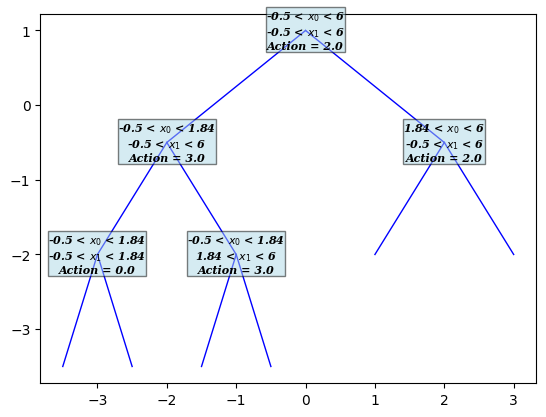

In [306]:
t.plot_tree_2D(0, 1, 2, 1.5, bounds = color_bounds)

Left node is empty
Left node is empty
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Left node is empty
Tree pruned at 5
Tree pruned at 5
Left node is empty
Tree pruned at 5
Tree pruned at 5
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 6
Tree pruned at 6
Left node is empty
Tree pruned at 6
Tree pruned at 6
Left node is empty
Tree pruned at 5
Tree pruned at 5
Left node is empty
Tree pruned at 5
Tree pruned at 5
Left node is empty
Tree pruned at 5
Tree pruned at 5
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 4
Tree pruned at 4
Left node is empty
Tree pruned at 6
Tree pruned at 6
Left node is empty
Tree pruned at 6
Tree pruned at 6
Left node is empty
Tree pruned at 5
Tree pruned at 5


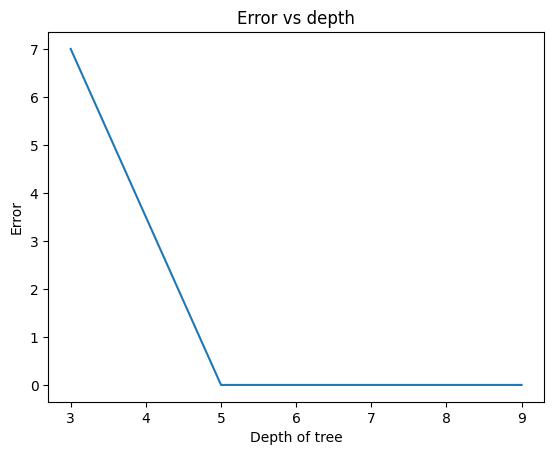

In [307]:
SIZE = 100
DIMENSIONS = 1
DEPTH = 3
DEPTH_RANGE = np.arange(3,10,2)
depth_to_error = {}

data = generate_data(SIZE, DIMENSIONS, g)
n = Node(data, 0)

for d in range(3,10,2):
    t = Tree(n,d)
    t.build_tree()
    depth_to_error[d] = t.calculate_approximation_error()

plt.plot(DEPTH_RANGE, [depth_to_error[d] for d in DEPTH_RANGE])
plt.title('Error vs depth')
plt.xlabel('Depth of tree')
plt.ylabel('Error')
plt.show()

In [ ]:
import numpy as np

class BloodGlucoseEnvironment:
    def __init__(self, num_states=30, actions=[0, 1, 2], discount_factor=0.8):
        self.num_states = num_states
        self.actions = actions
        self.discount_factor = discount_factor
        self.T = self._compute_transition_probabilities()
        self.R = self._compute_rewards()

    def _compute_transition_probabilities(self):
        T = np.zeros((self.num_states, len(self.actions), self.num_states))
        for s in range(self.num_states):
            for a in self.actions:
                if a == 0:
                    for t in range(min(s + 10, self.num_states)):
                        T[s, a, t] = 0.7 / min(s + 10, self.num_states)
                    for t in range(s + 1):
                        T[s, a, t] += 0.3 / (s + 1)
                elif a == 1:
                    for t in range(min(s + 5, self.num_states)):
                        T[s, a, t] = 0.3 / min(s + 5, self.num_states)
                    for t in range(s + 1):
                        T[s, a, t] += 0.7 / (s + 1)
                elif a == 2:
                    for t in range(s + 1):
                        T[s, a, t] = 1.0 / (s + 1)
        return T

    def _compute_rewards(self):
        R = np.zeros((self.num_states, len(self.actions), self.num_states))
        for s in range(self.num_states):
            for a in self.actions:
                for t in range(self.num_states):
                    R[s, a, t] = 1.5 / (abs((s / 29) - (a / 2)) + 1) + np.abs(s/29 - a/2)/20
        return R

    def step(self, state, action):
        next_state = np.random.choice(self.num_states, p=self.T[state, action])
        reward = self.R[state, action, next_state]
        return next_state, reward

    def get_transition_probabilities(self):
        return self.T

    def get_rewards(self):
        return self.R


In [ ]:
def policy_iteration(env, num_iterations=20000):
    policy = np.zeros(env.num_states, dtype=int)  # Initialize policy arbitrarily
    V = np.zeros(env.num_states)  # Initialize value function
    gamma = env.discount_factor

    for _ in range(num_iterations):
        # Policy evaluation
        for s in range(env.num_states):
            action = policy[s]
            next_state, reward = env.step(s, action)
            V[s] = reward + gamma * V[next_state]

        # Policy improvement
        new_policy = np.zeros(env.num_states, dtype=int)
        for s in range(env.num_states):
            best_action = None
            best_value = float('-inf')
            for a in env.actions:
                next_state, reward = env.step(s, a)
                value = reward + gamma * V[next_state]
                if value > best_value:
                    best_value = value
                    best_action = a
            new_policy[s] = best_action
        if np.array_equal(new_policy, policy):
            break
        policy = new_policy

    return policy, V

# Create the environment
env = BloodGlucoseEnvironment()

# Find the optimal policy
optimal_policy, optimal_values = policy_iteration(env)

print("Optimal Policy:")
print(optimal_policy)
print("Optimal Values:")
print(optimal_values)


Optimal Policy:
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Optimal Values:
[6.73206738 6.6822192  6.79232799 6.7984098  6.57128985 6.5042564
 6.44530933 6.54910877 6.43996413 6.61612768 6.5455531  6.50074349
 6.53723403 6.58078702 6.97740806 6.70610511 6.75752219 6.82399057
 6.77835841 6.53605331 6.67637008 6.39006357 6.42380742 6.6758887
 6.52731947 6.56633105 6.5651422  6.65973893 6.89045198 6.90601775]


In [ ]:
def make_list_into_function(l):

    def functor(num):

        if (num >= len(l)) or (num < 0):
            return 0
        else:
            return l[num]

    return functor


optimal_function = make_list_into_function(optimal_policy)

In [ ]:
data =  [Data(np.array([i]), y) for i,y in enumerate(optimal_policy)]
n = Node(data, 0, split_range=5)
t = Tree(n, DEPTH)
t.build_tree()
print(t.print_tree())

0th dimension < 7.25, depth 1, action 1.0
0th dimension < 0.3684210526315789, depth 2, action 0.0
0th dimension < 0.0, depth 3, action 0.0
0th dimension < 4.0, depth 3, action 0.0
0th dimension < 20.157894736842106, depth 2, action 1.0
0th dimension < 14.0, depth 3, action 1.0
0th dimension < 25.0, depth 3, action 2.0
None


Plot partition line $x=-1$
Plot partition line $x=0.3684210526315789$
Plot partition line $x=7.25$
Plot partition line $x=20.157894736842106$


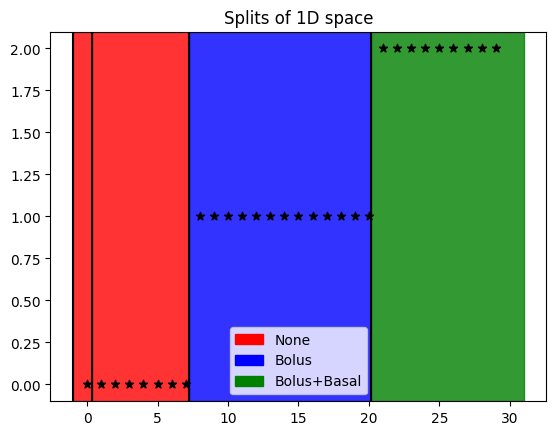

In [ ]:
x_vals = [p.x for p in data]
y_vals = [p.y for p in data]
action_color_dict = {0:'red', 1:'blue', 2:'green'}

fig, ax = plt.subplots()
t.plot_splits(ax, action_color_dict, color_bounds=[-1,31], plotted_colors = [])
ax.scatter(x_vals, y_vals, marker = '*',color='black')

red_patch = mpatches.Patch(color='red', label='None')
blue_patch = mpatches.Patch(color='blue', label='Bolus')
green_patch = mpatches.Patch(color='green', label='Bolus+Basal')

ax.legend(handles=[red_patch, blue_patch, green_patch])

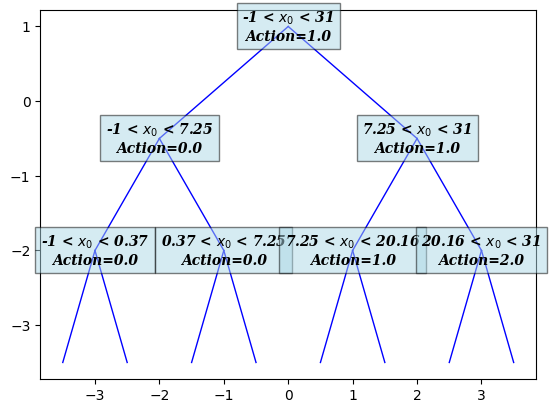

In [ ]:
t.plot_tree(0, 1, 2, 1.5, bounds = [-1,31])

In [ ]:
split_ranges = [5, 10, 15, 20, 25, 30]
#split_to_color = {5:'red', 1}

for s in split_ranges:

    n = Node(data, 0, s)
    for d in range(2,8):
        t = Tree(n,d)
        t.build_tree()
        depth_to_error[d] = t.calculate_approximation_error()

    plt.plot(range(2,8), [depth_to_error[d] for d in range(2,8)], label = f'Split value: {s}')

plt.title('Error vs depth')
plt.xlabel('Depth of tree')
plt.ylabel('Error')
plt.legend()
plt.show()